## 第四章 神经网络的学习

### 4.2 损失函数 loss function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

#### 4.2.1 均方误差法 Mean Squared Error - MSE

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
t_label = [2]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

mse = mean_squared_error(np.array(y), np.array(t))
print(mse)

0.09750000000000003


In [4]:
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

mse = mean_squared_error(np.array(y2), np.array(t))
print(mse)

0.5975


#### 4.2.2 交叉熵误差 （ cross entropy error ）

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [6]:
print(-np.log(0.1))
print(-np.log(0.5))
print(-np.log(0.9))

2.3025850929940455
0.6931471805599453
0.10536051565782628


In [7]:
print(cross_entropy_error(np.array(y), np.array(t)))
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


#### 4.2.3 mini-batch 学习

In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(batch_mask)
print(x_batch)
print(t_batch)

[19374 28227 35831 35894 11456 41297 57867 32726 31836 21526]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### 4.2.4 mini-batch 版交叉熵误差的实现

In [10]:
def cross_entropy_error_one_hot(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [11]:
cross_entropy_error_one_hot(np.array(y), np.array(t))

np.float64(0.510825457099338)

In [12]:
def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [13]:
cross_entropy_error_label(np.array(y), np.array(t_label))

np.float64(0.510825457099338)

##### !!解释上面最后一行代码：监督数据是标签形式（非 one-hot 表示，而是像“2”“7”这样的标签）

In [14]:
# 首先强调下，这是numpy数组的专属操作，普通列表[[1,2], [3,4], ...]无法如此操作
yy = np.array([
    [0.1, 0.2, 0.6, 0.05, 0.05],  # 对类别2预测概率0.6
    [0.7, 0.1, 0.1, 0.05, 0.05],  # 对类别0预测概率0.7
    [0.1, 0.1, 0.2, 0.5, 0.1]     # 对类别3预测概率0.5
])
t_one_hot = np.array([
    [0, 0, 1, 0, 0],  # 标签2
    [1, 0, 0, 0, 0],  # 标签0
    [0, 0, 0, 1, 0]   # 标签3
])
t_labels = np.array([2, 0, 3])  # 同样的数据，用标签形式表示，直接存储正确类别的索引

batch_size = yy.shape[0]
indices = np.arange(batch_size)  # [0, 1, 2]
print("样本索引:", indices)      # [0, 1, 2]
print("真实标签:", t_labels)     # [2, 0, 3]

selected_probs = yy[indices, t_labels]
print("选中的概率:", selected_probs)  # [0.6, 0.7, 0.5]
# 相当于：
# y[0, 2] → 第0个样本，第2个类别的概率 = 0.6
# y[1, 0] → 第1个样本，第0个类别的概率 = 0.7
# y[2, 3] → 第2个样本，第3个类别的概率 = 0.5


def cross_entropy_one_hot(y, t):
    return -np.sum(t * np.log(y + 1e-7)) / len(t)


def cross_entropy_label(y, t):
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


result1 = cross_entropy_one_hot(yy, t_one_hot)
result2 = cross_entropy_label(yy, t_labels)
print(result1)      # 0.5202157462469678
print(result2)      # 0.5202157462469678

样本索引: [0 1 2]
真实标签: [2 0 3]
选中的概率: [0.6 0.7 0.5]
0.5202157462469678
0.5202157462469678


### 4.3 数值微分

#### 4.3.1 导数：表示的是某个瞬间的变化量

In [15]:
# 向前差分
def numerical_diff_forward(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / h

# 中心差分
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [16]:
# 例子函数
def function_1(x):
    return 0.01 * x**2 + 0.1 * x

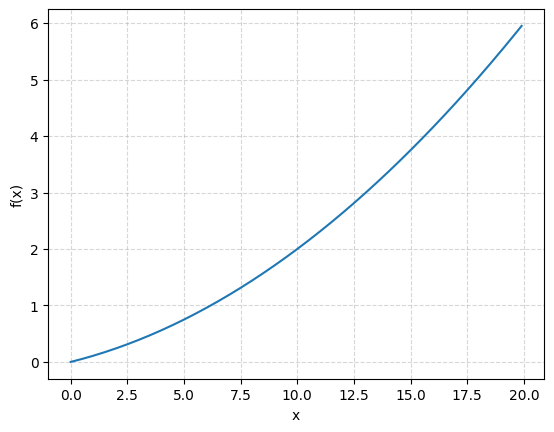

In [17]:
# 画出函数图像
x = np.arange(0, 20, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [18]:
# 求导
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


求f(x)在x=5处导数的值：0.1999999999990898
求f(x)在x=10处导数的值：0.2999999999986347


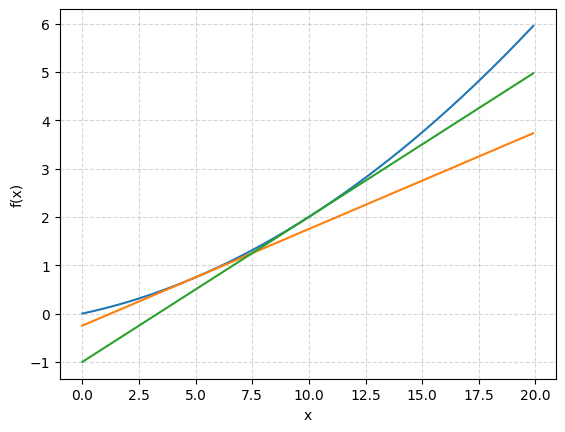

In [19]:
# x = 5, x = 10 处的切线：直线的斜率使用数值微分的值
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(f'求f(x)在x={x}处导数的值：{d}')
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

tf = tangent_line(function_1, 10)
y3 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 4.3.3 偏导数：有多个变量的函数的导数

In [22]:
# y = a**2 + b**2
def function_2(x):
    return x[0]**2 + x[1]**2
    # return np.sum(x**2)

# x[0] = 3, x[1] = 4, 关于x[0]的偏导数
def function_tmp1(x0):
    return x0**2 + 4**2

# x[0] = 3, x[1] = 4, 关于x[1]的偏导数
def function_tmp2(x1):
    return 3**2 + x1**2

print(numerical_diff(function_tmp1, 3))
print(numerical_diff(function_tmp2, 4))

6.00000000000378
7.999999999999119


### 4.4 梯度 Gradient: 由全部变量的偏导数汇总而成的向量(dy/dx0, dy/dx1,...)